In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\rohit\OneDrive\Desktop\Machine learning\Social_Network_Ads (1).csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
x=df.iloc[:,2:4]
y=df.iloc[:,-1]

In [6]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
X_train.size,X_test.size,Y_train.size,Y_test.size

(640, 160, 320, 80)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [12]:
Y_predict=model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predict)

0.925

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_predict)

array([[57,  1],
       [ 5, 17]])

<Axes: >

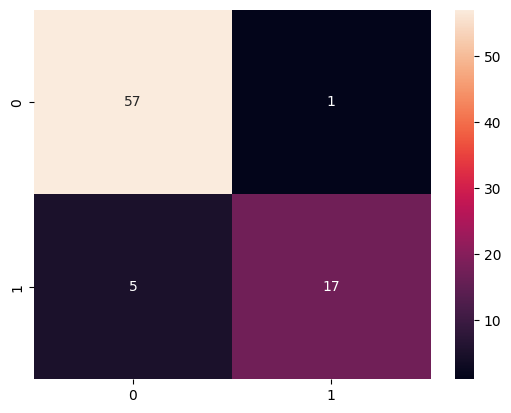

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test , Y_predict)
sns.heatmap(cm , annot=True)

In [16]:
import pickle
with open('social.pkl','wb') as f:
 pickle.dump(model,f)
    

In [17]:
picklein=open("social.pkl",'rb')
predictmodel=pickle.load(picklein)

In [18]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
predictmodel.predict([[31,18000]])

array([1])